In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML



### Data

In [19]:
def blogData_train_read() :
    u''' Reads and prepare data from blog feedback data train set
    
    '''

    data = pd.read_csv("./data/blogData_train.csv", header=None)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    header = pd.read_csv("./data/blogData_label.csv", header=None)
    header = list(header[0])
    
    if len(header) != data.shape[1] :
        raise Exception('Los encabezados y la cantidad de características NO COINCIDE !!!')

    data.columns = header
    
    return data


In [20]:
data = blogData_train_read()
data.shape

(49203, 281)

In [21]:
data

,media_nc_total_before_BT,std_nc_total_before_BT,min_nc_total_before_BT,max_nc_total_before_BT,median_nc_total_before_BT,media_nc_24_before_BT,std_nc_24_before_BT,min_nc_24_before_BT,max_nc_24_before_BT,median_nc_24_before_BT,...,wednesday_post,thursday_post,friday_post,saturday_post,sunday_post,parents,min_parents,max_parents,media_parents,comments
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49198,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49199,33.00000,0.000000,33.0,33.0,33.0,11.00000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49200,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49201,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data.iloc[:, 0:62].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
media_nc_total_before_BT,49203.0,38.091771,80.520645,0.0,2.114014,10.630660,39.644764,1122.6666
std_nc_total_before_BT,49203.0,45.066725,62.820890,0.0,4.766201,19.170923,75.590485,559.4326
min_nc_total_before_BT,49203.0,0.371868,7.057835,0.0,0.000000,0.000000,0.000000,726.0000
max_nc_total_before_BT,49203.0,324.455907,440.723194,0.0,21.000000,150.000000,438.000000,2044.0000
median_nc_total_before_BT,49203.0,24.025588,71.112351,0.0,0.000000,4.000000,14.000000,1314.0000
...,...,...,...,...,...,...,...,...
nl_between_24_48,49203.0,0.183810,0.884901,0.0,0.000000,0.000000,0.000000,24.0000
nl_first_24_BT,49203.0,0.465724,1.495308,0.0,0.000000,0.000000,0.000000,26.0000
nl_diff_24_48,49203.0,0.011971,1.184428,-20.0,0.000000,0.000000,0.000000,23.0000
timelength_post_BT,49203.0,34.788875,20.662955,0.0,14.000000,35.000000,55.000000,72.0000


In [5]:
def blogData_labels(data) :
    u''' Create a dictionary with some keys associates to list of features in the final work dataframe
    
    '''
    columns = list(data.columns)

    labels = dict()

    labels['sd_nc_total_before_BT'] = columns[0:5]
    labels['sd_nc_24_before_BT'] = columns[5:10]
    labels['sd_nc_between_24_48'] = columns[10:15]
    labels['sd_nc_first_24_BT'] = columns[15:20]
    labels['sd_nc_diff_24_48'] = columns[20:25]
    
    labels['sd_nl_total_before_BT'] = columns[25:30]
    labels['sd_nl_24_before_BT'] = columns[30:35]
    labels['sd_nl_between_24_48'] = columns[35:40]
    labels['sd_nl_first_24_BT'] = columns[40:45]
    labels['sd_nl_diff_24_48'] = columns[45:50]
    
    labels['nc_total_before_BT'] = columns[50:51]
    labels['nc_24_before_BT'] = columns[51:52]
    labels['nc_between_24_48'] = columns[52:53]
    labels['nc_first_24_BT'] = columns[53:54]
    labels['nc_diff_24_48'] = columns[54:55]
    
    labels['nl_total_before_BT'] = columns[55:56]
    labels['nl_24_before_BT'] = columns[56:57]
    labels['nl_between_24_48'] = columns[57:58]
    labels['nl_first_24_BT'] = columns[58:59]
    labels['nl_diff_24_48'] = columns[59:60]
    
    labels['nc'] = columns[50:55]
    labels['nl'] = columns[55:60]

    labels['timelength_post_BT'] = columns[60:61]
    labels['length_post'] = columns[61:62]

    labels['frequent_word'] = columns[62:262]

    labels['weekday_BT'] = columns[262:269]
    labels['weekday_post'] = columns[269:276]
    labels['parents'] = columns[276:280]
    labels['comments'] = columns[280:281]

    return labels


In [6]:

labels = blogData_labels(data)
target = 'comments'


In [7]:
def set_figure(row, col, suptitle=None) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, 
                     verticalalignment='center', fontsize='xx-large', fontweight='extra bold');
    return fig

In [8]:
def show_corr(data, target) :
    u'''
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

---

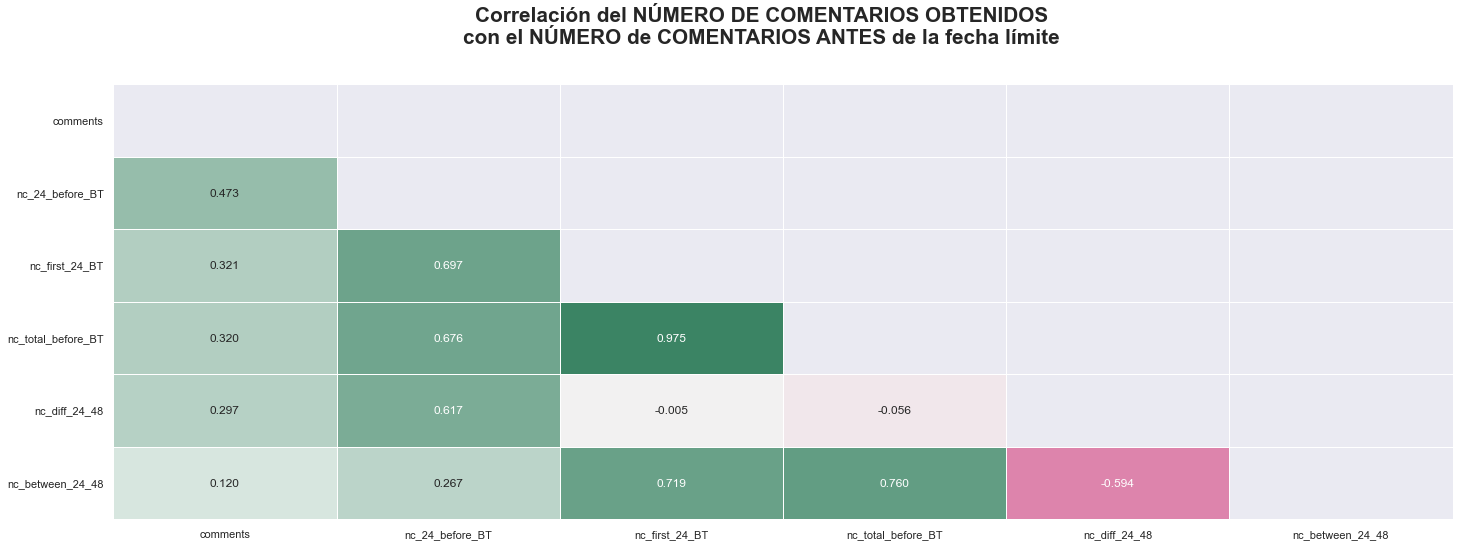

In [9]:

fig = set_figure(24, 8, 
                 suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTES de la fecha límite')
show_corr(data=data[labels['nc'] + [target]], target=target)


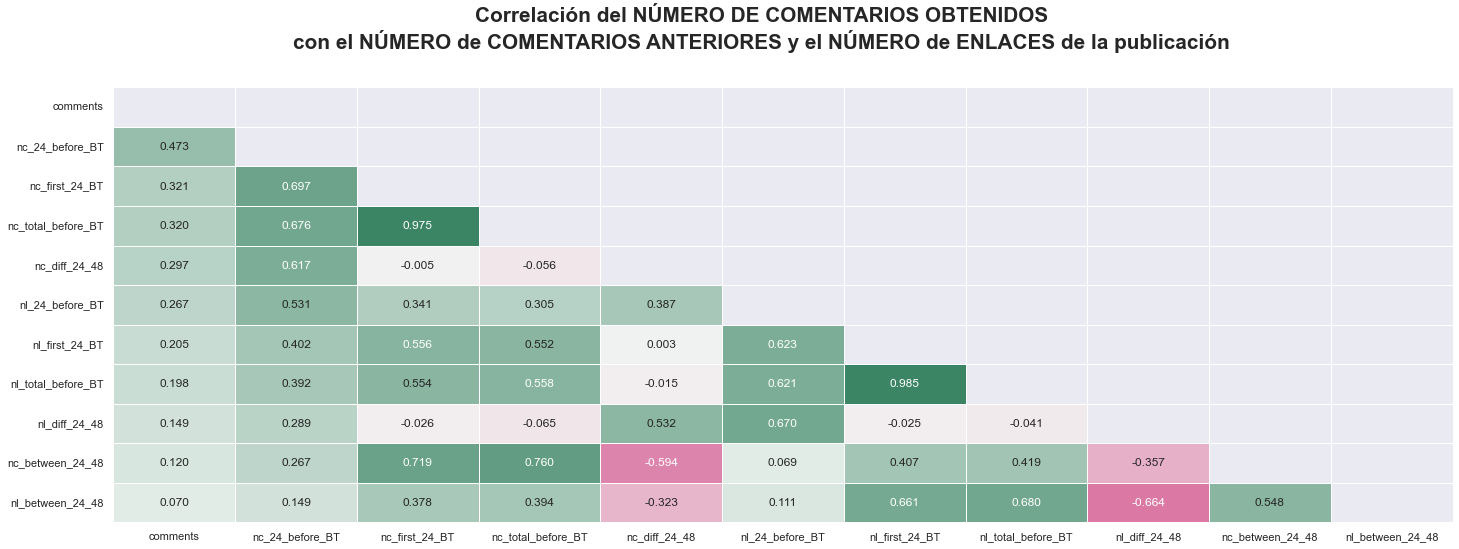

In [10]:

fig = set_figure(24, 8, 
                 suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTERIORES y el NÚMERO de ENLACES de la publicación')
show_corr(data=data[labels['nc'] + labels['nl'] + [target]], target=target)


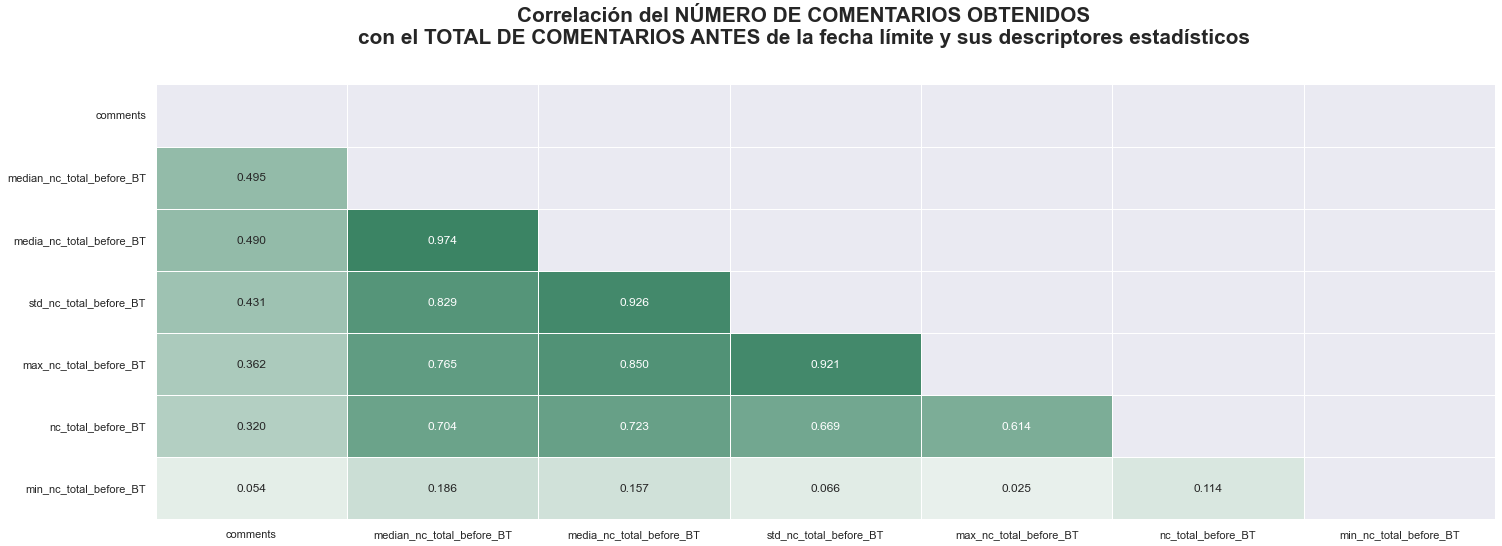

In [11]:

fig = set_figure(24, 8, 
                 suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el TOTAL DE COMENTARIOS ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data[labels['nc_total_before_BT'] + labels['sd_nc_total_before_BT'] + [target]], target=target)


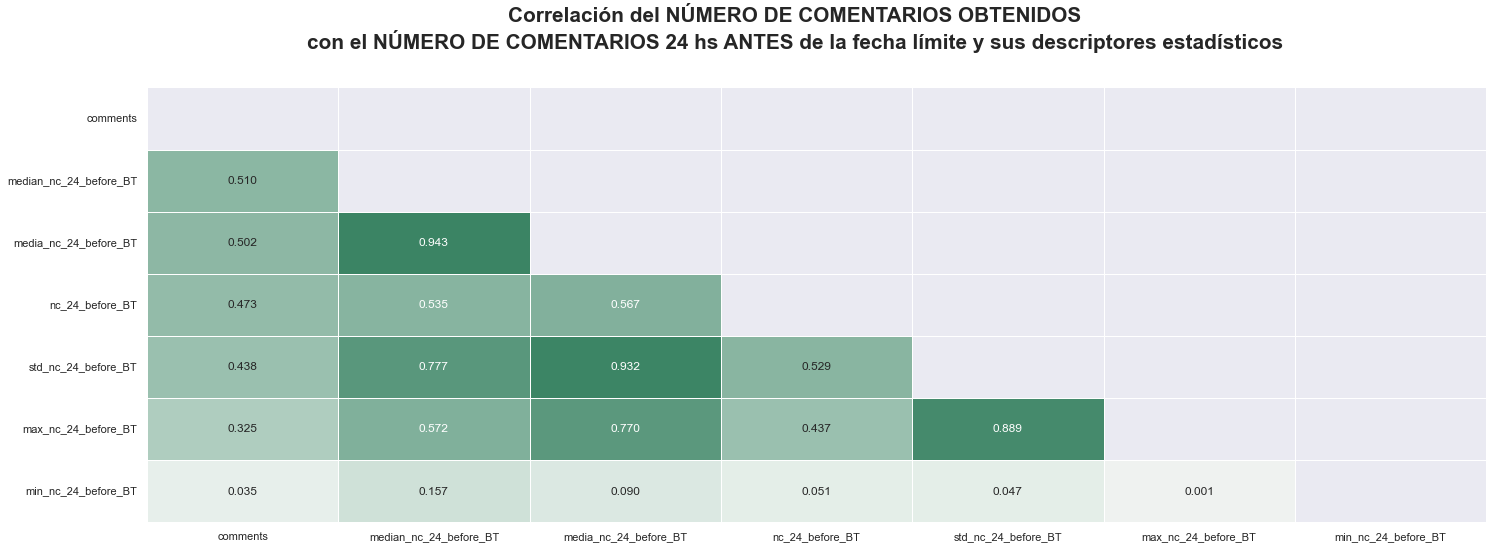

In [12]:

fig = set_figure(24, 8, 
                 suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS 24 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data[labels['nc_24_before_BT'] + labels['sd_nc_24_before_BT'] + [target]], target=target)


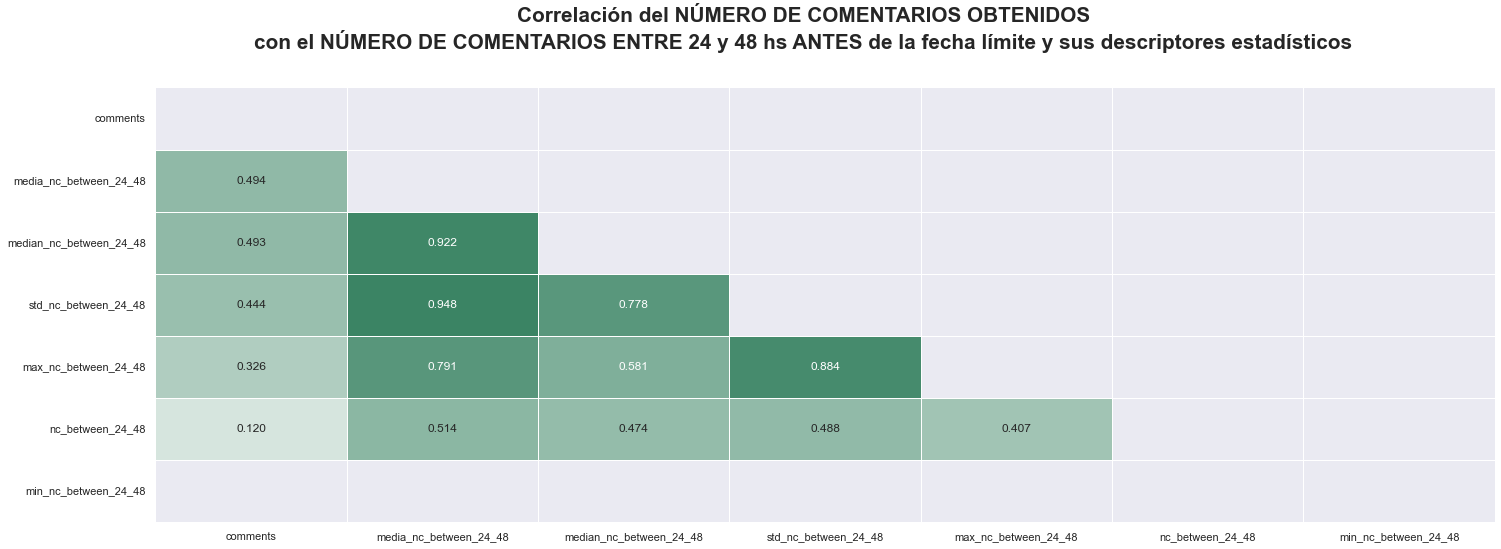

In [13]:

fig = set_figure(24, 8, 
                 suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS ENTRE 24 y 48 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data[labels['nc_between_24_48'] + labels['sd_nc_between_24_48'] + [target]], target=target)


,word,count
80,fw_81,32692.0
183,fw_184,32016.0
38,fw_39,30105.0
150,fw_151,23347.0
169,fw_170,19618.0
163,fw_164,17757.0
4,fw_5,17638.0
95,fw_96,16742.0
88,fw_89,13281.0
147,fw_148,13123.0


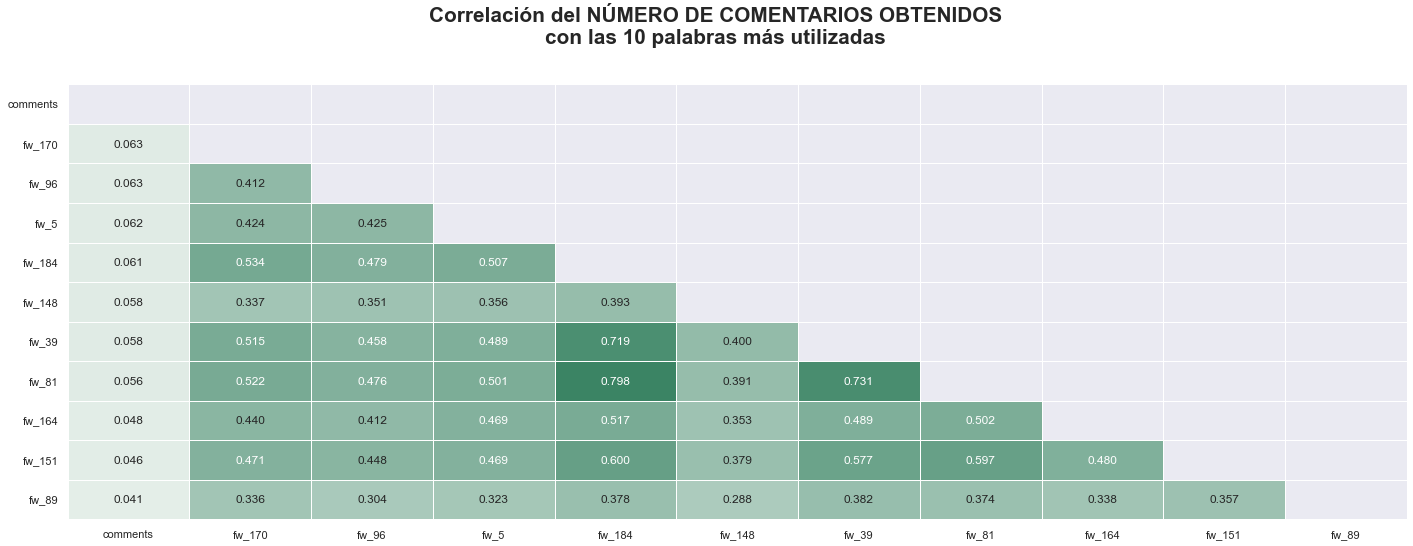

In [14]:

def get_frequent_word_counts(data) :
    u'''
    '''

    result = pd.DataFrame(columns=['count'], data=data.sum() )
    result.reset_index(drop=False, inplace=True)
    result.rename(columns={'index' : 'word'}, inplace=True)
    result.sort_values(by='count', ascending=False, inplace=True)
    
    return result

temp = get_frequent_word_counts(data[labels['frequent_word']])
display(temp[:10])

first_10_words = list(temp['word'][:10])

fig = set_figure(24, 8, suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS\ncon las 10 palabras más utilizadas')
show_corr(data=data[first_10_words + [target]], target=target)


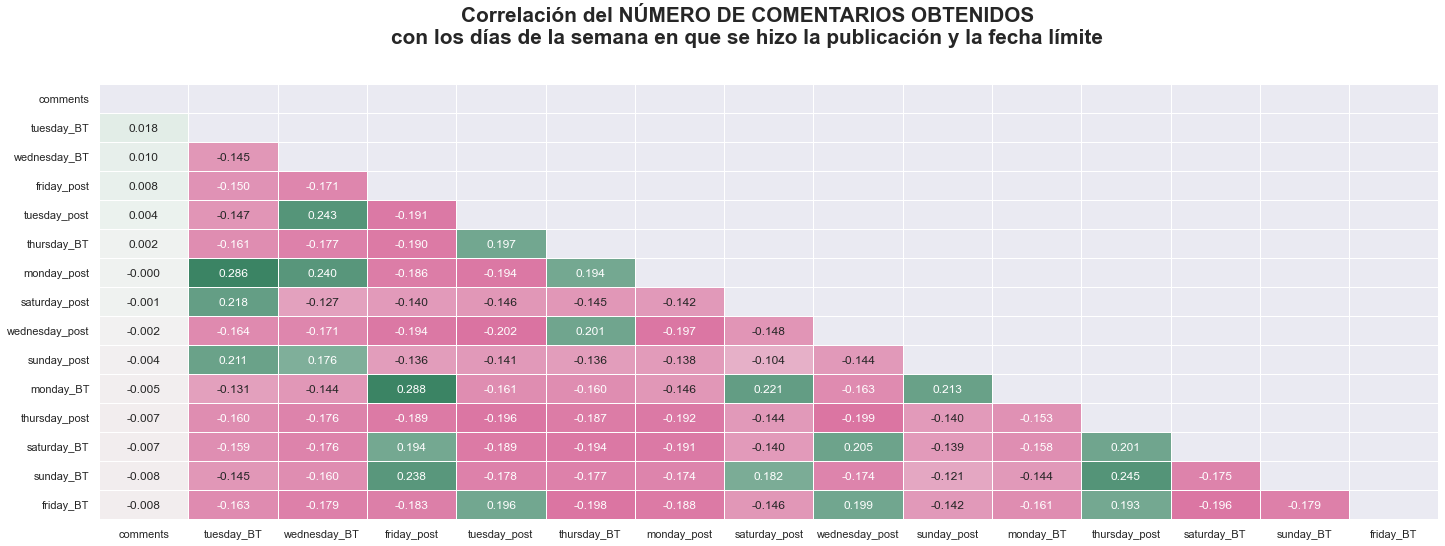

In [15]:

fig = set_figure(24, 8, 
                 suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con los días de la semana en que se hizo la publicación y la fecha límite')
show_corr(data=data[labels['weekday_BT'] + labels['weekday_post'] + [target]], target=target)


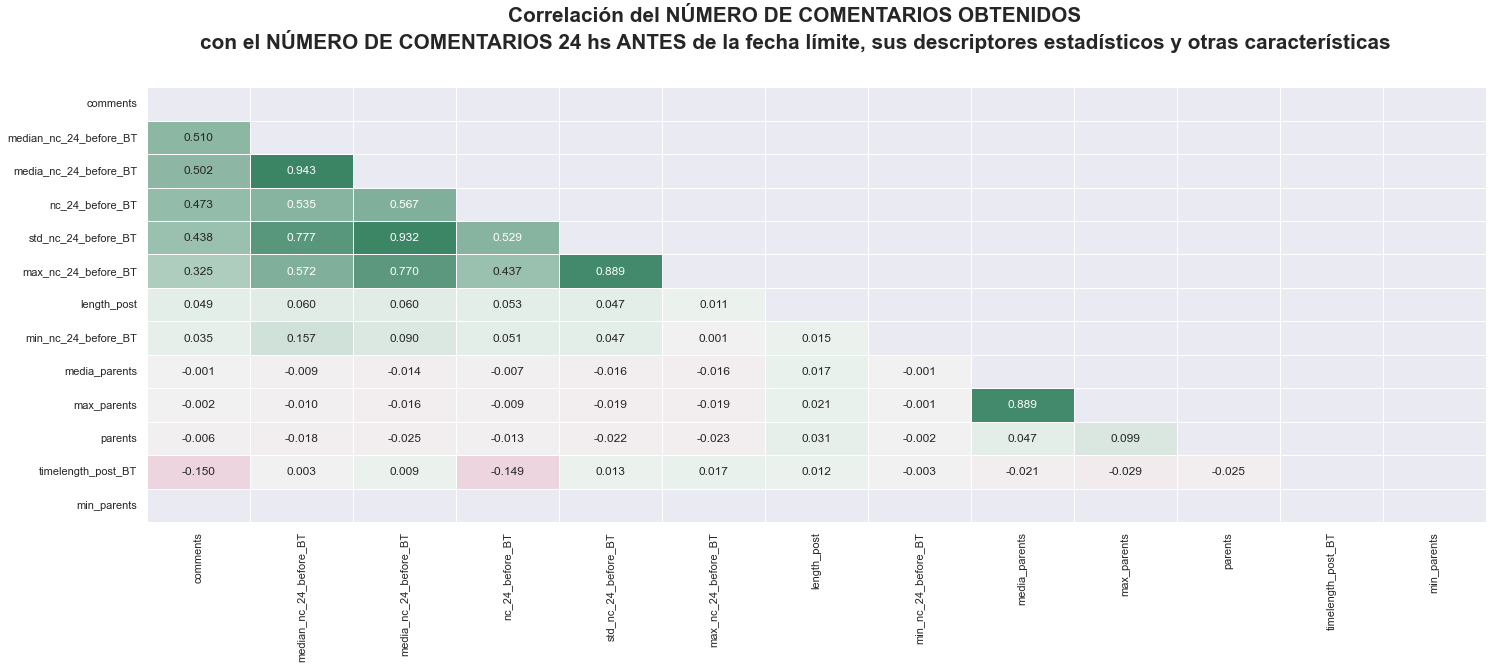

In [16]:

fig = set_figure(24, 8, 
                 suptitle='Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS 24 hs ANTES de la fecha límite, sus descriptores estadísticos y otras características')
show_corr(data=data[labels['nc_24_before_BT'] + labels['sd_nc_24_before_BT'] + labels['timelength_post_BT'] + labels['length_post'] + labels['parents'] + [target]], target=target)
    

In [17]:
# mask = data['nc_total_before_BT'] < 500
# mask = data['comments'] < 500
# work = data[mask]
# work = data

In [18]:
def show_comments_by_sd(work) :

    fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de los comentarios en las primeras 24hs de publicación pero antes de la fecha límite')
    sns.lineplot(x=work['media_nc_first_24_BT'], y=work['comments'], sort=True, err_style='band');
    sns.scatterplot(x=work['media_nc_first_24_BT'], y=work['comments']);

    fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de comentarios entre 24hs y 48hs antes de la fecha límite')
    sns.lineplot(x=work['media_nc_between_24_48'], y=work['comments'], sort=True, err_style='band');
    sns.scatterplot(x=work['media_nc_between_24_48'], y=work['comments']);

    # fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de la diferencia de comentarios entre 24hs y 48hs antes de la fecha límite')
    # sns.lineplot(x=work['media_nc_diff_24_48'], y=work['comments'], sort=True, err_style='band');
    # sns.scatterplot(x=work['media_nc_diff_24_48'], y=work['comments']);


    fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA de comentarios 24hs antes de la fecha límite')
    sns.lineplot(x=work['media_nc_24_before_BT'], y=work['comments'], sort=True, err_style='band');
    sns.scatterplot(x=work['media_nc_24_before_BT'], y=work['comments']);

    fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con la MEDIA del total de comentarios antes de la fecha límite')
    sns.lineplot(x=work['media_nc_total_before_BT'], y=work['comments'], sort=True, err_style='band');
    sns.scatterplot(x=work['media_nc_total_before_BT'], y=work['comments']);

    return

# fig = set_figure(24, 3, suptitle='Comentarios obtenidos en relación con el TOTAL de comentarios antes de la fecha límite')
# sns.lineplot(data=data, x='nc_total_before_BT', y='comments', sort=True, err_style='band');
# sns.scatterplot(data=data, x='nc_total_before_BT', y='comments');
